Using TensorFlow backend.


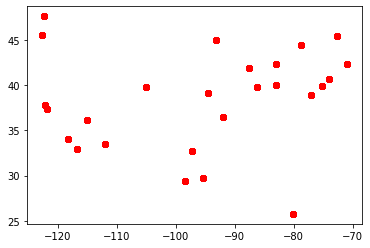

In [1]:
# -*- coding:utf-8 -*- 
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

from geopy.geocoders import Nominatim
#import tensorflow as tf
from mxnn import NN 
from mxnn import print1d

geoneed=0

def rdic():
    f=open("dic","r")
    jf=f.read()
    data=dict()
    data=eval(jf)
    data['U.S. Total, U.S. Total']=[36.4280088,-92.0269643]
    #print(data)
    f.close()
    return data


def sdic(dic):
    f=open("dic","w+")
    f.write(str(dic))
    f.close()

f=pd.read_csv("BCHI-dataset_2019-03-04.csv")

f=f[f.Indicator.isin(['Lung Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)'])]
tset=f[["Year","Sex","Race/Ethnicity","Place","Value"]].values
head=list(f.columns.values)
resualt=f["Value"].values
place=f[["Place"]].values




loc=rdic()
#loc=dict();
lx=list()
ly=list()
#bpnn(sizes=[4,3,1])
#bpnn.SGD(bpnn,X_train,20,5,0.0001)
if geoneed is not 0:
    gps = Nominatim()
    for address in place:

        asdf=loc.get(address[0])
        if asdf is None:
            location = gps.geocode(address)
            if location is not None:
                print(address,location.latitude,location.longitude)
                loc[address[0]]=[location.latitude,location.longitude]
                sdic(loc)
        else:
            print(address,asdf[0],asdf[1])


for i in tset:
    num=loc.get(i[-2])
    i[-2]=num[0]
    i[-1]=num[1]
    lx.append(num[1])
    ly.append(num[0])


num=[]

le = preprocessing.LabelEncoder()

for i in range(1,3):
    tset[:,i] = le.fit_transform(tset[:,i])-0.5
    num.append(le)
    le.inverse_transform



tset[:,0]=tset[:,0]-2000


X_train, X_test, y_train, y_test = train_test_split(tset, resualt, test_size=0.30)

plt.figure("location")
plt.plot(lx,ly,'ro');
#plt.show()



In [ ]:
#ann

ann=NN([5],[7,'sigmoid'],[3,'relu'],[1,'relu']]}
ann.fit()X_train,y_train

res=ann.predict()

In [2]:
#线性回归

lrn=NN([[5],[1,'relu']])
lrn.fit(X_train,y_train)
lrp=lrn.predict(X_train)

plt.plot(print1d(lrn.loss()))







AttributeError: 'list' object has no attribute 'set_model'